# 선형회귀 모델 작성, 예측, 평가

# LinearRegressor & RandomForestRegressor()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [8]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [9]:
premiumDf = pd.read_csv('./data1/premium.csv')
premiumDf.shape

(1338, 7)

In [10]:
premiumDF_encoded = premiumDf.copy()
premiumDF_encoded = pd.get_dummies(premiumDF_encoded, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=float)
# 변환된 데이터프레임 확인
print(premiumDF_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0  


In [11]:
premiumDF_encoded.isnull().sum()

age                 0
bmi                 5
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [12]:
median_bmi = premiumDF_encoded['bmi'].median()
premiumDF_encoded['bmi'].fillna(median_bmi, inplace=True)
print(premiumDF_encoded.isnull().sum())

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3832\1204702379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  premiumDF_encoded['bmi'].fillna(median_bmi, inplace=True)


In [13]:
X = premiumDF_encoded.drop('charges', axis=1).values
y = premiumDF_encoded['charges'].values
premiumDf.shape

(1338, 7)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([14347.19137104, -1319.26633728, 11033.92904397])

In [15]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(5890.126476973436), np.float64(34693589.9147435))

In [16]:
# 결정계수 
r2_score(y_test, y_pred)

np.float64(0.7316019757120598)

In [17]:
# 회귀식 
# w1, w0
lr.intercept_, lr.coef_

(np.float64(-12878.94452259121),
 array([  257.48449132,   373.86338868,   465.9458414 ,  -339.75288611,
        23646.4947996 ,  -261.01917622,  -907.24876137, -1034.11295653]))

In [18]:
np.round(lr.intercept_,1), np.round(lr.coef_,1)

(np.float64(-12878.9),
 array([  257.5,   373.9,   465.9,  -339.8, 23646.5,  -261. ,  -907.2,
        -1034.1]))

In [19]:
pd.Series(data = np.round(lr.coef_,1), index=premiumDF_encoded.drop('charges', axis=1).columns).sort_values(ascending=False)

smoker_yes          23646.5
children              465.9
bmi                   373.9
age                   257.5
region_northwest     -261.0
sex_male             -339.8
region_southeast     -907.2
region_southwest    -1034.1
dtype: float64

In [20]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error')
neg_mse_scores

array([-37340591.78320677, -38264653.28877384, -32947576.18014606,
       -39690717.93921629, -37118041.35265569])

In [21]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(6085.810097922871),
 array([6110.6948691 , 6185.84297317, 5739.9979251 , 6300.05697905,
        6092.4577432 ]))

In [22]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([0.75970927, 0.70539416, 0.7755101 , 0.73263119, 0.7556239 ]),
 np.float64(0.7457737249441502))

## RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr_r = RandomForestRegressor()
lr_r.fit(X_train, y_train)
y_pred1 = lr_r.predict(X_test)
y_pred1[:3]

array([15546.3160426,  1766.570547 , 13384.7918962])

In [24]:
# 평가
mse_R = mean_squared_error(y_test, y_pred1)
rmse_R = np.sqrt(mse_R)
rmse_R, mse_R

(np.float64(4872.8731952988965), np.float64(23744893.177462474))

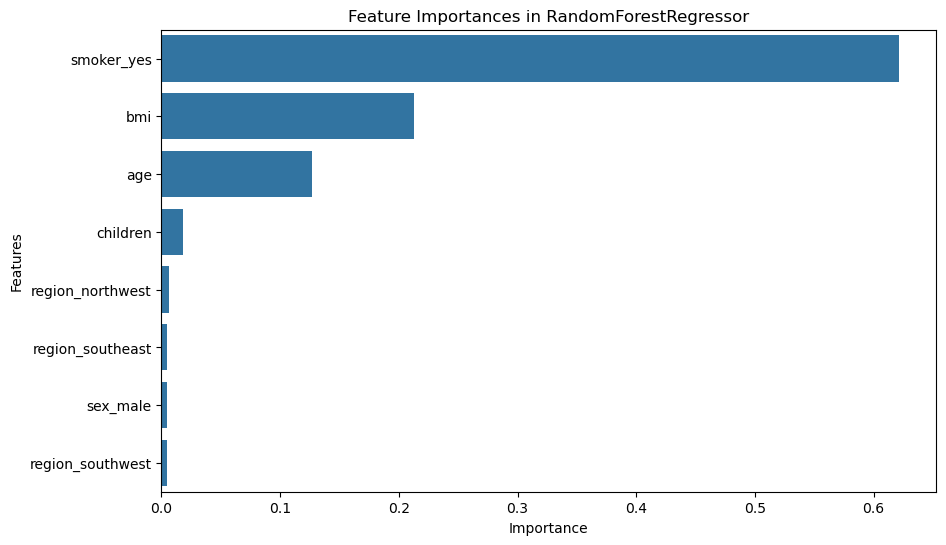

smoker_yes          0.621789
bmi                 0.212426
age                 0.127052
children            0.017876
region_northwest    0.006259
region_southeast    0.005122
sex_male            0.004927
region_southwest    0.004550
dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 변수(Feature) 이름 가져오기
feature_names = premiumDF_encoded.drop('charges', axis=1).columns

# 변수 중요도 추출
importances = lr_r.feature_importances_
feature_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importances in RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

print(feature_imp)

In [26]:
# 결정계수 
r2_score(y_test, y_pred1)

np.float64(0.8163037485765982)

In [27]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr_r, X, y, scoring='neg_mean_squared_error')
neg_mse_scores

array([-22998215.62891527, -29190412.27624151, -22585251.88533434,
       -24665297.59451963, -23465889.79623833])

In [28]:
# MSE, RMSE
RMSE_R = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE_R), RMSE_R

(np.float64(4952.286478823321),
 array([4795.64548616, 5402.81521767, 4752.39433184, 4966.41697751,
        4844.16038094]))

In [29]:
# R2
r2_scores_R = cross_val_score(lr_r, X, y, scoring='r2', cv=5)
r2_scores_R, np.mean(r2_scores_R)

(array([0.85038781, 0.78048892, 0.84916337, 0.83547528, 0.84724527]),
 np.float64(0.8325521293380291))

교차 검증을 통해 두 모델의 일반화 성능을 평가한 결과, <br>
선형회귀 모델의 평균 결정계수는 0.745,<br>
랜덤포레스트 회귀 모델은 0.829로 측정되었습니다

## 최종모델 선정 : RandomForestRegressor

# 다항회귀 모델 
Y = w0 + w1X1 + w2X2 + w3X1^2 + w4X2^2

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear', LinearRegression())])
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Linear', LinearRegression())])

In [32]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(22552796.094449986)

In [33]:
r2_score(y_test, pred_poly)

np.float64(0.8255261006775549)

2차~5차 다항회귀 시뮬레이션

In [34]:
results =[]
for degree in range(1, 5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('Linear', LinearRegression())
    ])
    
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)

    results.append({
        'degree': degree,
        'MSE': mse,
        'RMSE': rmse,
        'r2': r2
    })
pd.DataFrame(results)

,degree,MSE,RMSE,r2
0,1,3.469359e+07,5890.126477,0.731602
1,2,2.255280e+07,4748.978426,0.825526
2,3,2.404427e+07,4903.496142,0.813988
3,4,4.803001e+07,6930.368537,0.628428


In [35]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [36]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

print("\n[릿지 회귀]")
print("MSE:", mean_squared_error(y_test, pred_ridge))
print("R2:", r2_score(y_test, pred_ridge))


[릿지 회귀]
MSE: 34728645.42634645
R2: 0.7313307777738309


In [38]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_alpha = ridge_cv.alpha_
print(f'"MSE:", {ridge_mse}')
print(f'"R2:", {ridge_r2}')
print(f'"Ralpha:", {ridge_alpha}')

"MSE:", 34728645.42634645
"R2:", 0.7313307777738309
"Ralpha:", 1.0


In [39]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("\n[라쏘 회귀]")
print("MSE:", mean_squared_error(y_test, pred_lasso))
print("R2:", r2_score(y_test, pred_lasso))


[라쏘 회귀]
MSE: 34693677.200823136
R2: 0.731601300445782


In [40]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f'"MSE:", {lasso_mse}')
print(f'"R2:", {lasso_r2}')

"MSE:", 34853184.21196369
"R2:", 0.7303673155293924


In [41]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [42]:
enet_pred = enet.predict(X_test)
print('[엘라스틱넷 회귀]')
print("MSE:",mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))

[엘라스틱넷 회귀]
MSE: 39914782.182594724
R2: 0.6912095662622895


In [55]:
results = pd.DataFrame({

    '모델' : ['다항회귀', '릿지회귀', '라쏘회귀','엘라스틱넷회귀'],


    'MSE' : [mean_squared_error(y_test,y_pred1),
             mean_squared_error(y_test,ridge_preds),
             mean_squared_error(y_test,lasso_preds),
             mean_squared_error(y_test,enet_pred)],
    
    'RMSE' :  [np.sqrt(mean_squared_error(y_test,y_pred1)),
            np.sqrt(mean_squared_error(y_test,ridge_preds)),
            np.sqrt(mean_squared_error(y_test,lasso_preds)),
            np.sqrt(mean_squared_error(y_test,enet_pred))],


    'R2' : [r2_score(y_test,y_pred1),
            r2_score(y_test,ridge_preds),
            r2_score(y_test,lasso_preds),
            r2_score(y_test, enet_pred)]
})
results

,모델,MSE,RMSE,R2
0,다항회귀,2.374489e+07,4872.873195,0.816304
1,릿지회귀,3.472865e+07,5893.101512,0.731331
2,라쏘회귀,3.485318e+07,5903.658545,0.730367
3,엘라스틱넷회귀,3.991478e+07,6317.814668,0.691210
